In [1]:
import numpy as np
import pandas as pd
import re
from tqdm import tqdm
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

In [2]:
def cols_null_percent(data: pd.DataFrame) -> pd.Series:
    """
    Function creates series with columns containing nans
    and draws heatmaps of data containing nans.

    :param data: dataset
    :return: series with percent of nan values
    """
    cols_null_percent = data.isnull().mean() * 100
    cols_with_null = cols_null_percent[
        cols_null_percent > 0
    ].sort_values(ascending=False)

    colors = ['blue', 'pink'] 
    fig = plt.figure(figsize=(16, 10))
    sns.heatmap(
        data[cols_with_null.index].isnull().T,
        cmap=sns.color_palette(colors),
    )

    return cols_with_null

In [191]:
def plot_histograms(data: pd.DataFrame,
                    n_row: int,
                    figsize: tuple[int, int]) -> None:
    """
    Function prints histograms with kernel density function
    of all numerical parameters.

    :param data: dataset
    :return: None
    """
    fig, axes = plt.subplots(n_row, 3, figsize=figsize)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    fig.suptitle('Params distribution', fontsize=16)
    axes = axes.flatten()
    cols = list(data.columns)
    if axes.shape[0] > len(cols):
        ax_del = axes.shape[0] - len(cols)
        for i in range(ax_del):
            fig.delaxes(axes[axes.shape[0] - i - 1])

    for i, col in enumerate(cols):
        hist = sns.histplot(
            data=data,
            x=col,
            bins=20,
            kde=True,
            ax=axes[i]
        );

# Part 1. Data from `theorg.com`

In [3]:
raw_data1 = pd.read_csv(
    'raw_data/dataset-full-part1.csv', sep=';', error_bad_lines=False
)
raw_data1.head(3)

b'Skipping line 1436: expected 17 fields, saw 18\n'
b'Skipping line 60004: expected 17 fields, saw 19\n'


,name,city,state,country,isPrimary,employeeRange,followerCount,positionCount,announcementsCount,following,promptDismissal,latestFundingRound,tags,verificationType,stage,websiteUrl,Industry
0,.,Berlin,None,Germany,True,10-50,0,0,0,False,None,"{'__typename': 'FundingRound', 'id': '437df374...",None,u,None,https://www.sharepop.com,"['Advertising', 'Marketing']"
1,.,None,None,None,None,None,2,1,0,False,None,None,None,u,None,None,[]
2,..,Vancouver,None,Canada,True,1-10,0,0,0,False,None,"{'__typename': 'FundingRound', 'id': '5b066db7...",None,u,None,https://www.dojo.co/,"['Electronics', 'Software']"


In [4]:
data1 = raw_data1.copy()
data1.shape

(131625, 17)

___

In [5]:
raw_data2 = pd.read_csv(
    'raw_data/dataset-full-part2.csv', sep=';', error_bad_lines=False
)
raw_data2.head(3)

,name,city,state,country,isPrimary,employeeRange,followerCount,positionCount,announcementsCount,following,promptDismissal,latestFundingRound,tags,verificationType,stage,websiteUrl,Industry,Unnamed: 17
0,Gamesight,Seattle,WA,United States,True,10-50,0,33,0,False,None,"{'__typename': 'FundingRound', 'id': 'de5e5cd8...",None,u,None,http://www.gamesight.io/,"['Analytics', 'Software', 'Test & Measurement']",NaN
1,Games Industry,None,None,None,None,1-10,0,0,0,False,None,None,None,u,None,http://www.gamesindustry.biz/,[],NaN
2,Gamesite,Manchester,CT,United States,True,1-10,0,0,0,False,None,None,None,u,None,http://www.gamesiteapp.com/,"['Apps', 'Mobile', 'Sports']",NaN


In [7]:
data2 = raw_data2.copy()
data2 = data2.drop(columns='Unnamed: 17')
data2.shape

(118428, 17)

___

In [8]:
raw_data3 = pd.read_csv(
    'raw_data/dataset-full-part3.csv', sep=';', error_bad_lines=False
)
raw_data3.head(3)

,name,city,state,country,isPrimary,employeeRange,followerCount,positionCount,announcementsCount,following,promptDismissal,latestFundingRound,tags,verificationType,stage,websiteUrl,Industry,Unnamed: 17
0,Pelle Pelle,None,None,None,None,10-50,1,1,0,False,None,None,None,u,None,https://pellepelle.us/,['Apparel & Fashion'],NaN
1,Pellego,Seattle,WA,United States,True,1-10,0,0,0,False,None,None,None,u,None,https://www.pellego.com/,"['Finance', 'Real Estate']",NaN
2,Pellegrini spa,Milan,Milano,Italy,True,5000-10000,0,0,0,False,None,None,None,u,None,https://www.gruppopellegrini.it/,['Restaurants'],NaN


In [9]:
data3 = raw_data3.copy()
data3 = data3.drop(columns='Unnamed: 17')
data3.shape

(128432, 17)

___

In [10]:
data = pd.concat([data1, data2, data3], ignore_index=True)
data.shape

(378485, 17)

In [11]:
data.duplicated().sum()

761

In [12]:
data = data.drop_duplicates(ignore_index=True)
data.shape

(377724, 17)

In [13]:
data.head()

,name,city,state,country,isPrimary,employeeRange,followerCount,positionCount,announcementsCount,following,promptDismissal,latestFundingRound,tags,verificationType,stage,websiteUrl,Industry
0,.,Berlin,None,Germany,True,10-50,0,0,0,False,None,"{'__typename': 'FundingRound', 'id': '437df374...",None,u,None,https://www.sharepop.com,"['Advertising', 'Marketing']"
1,.,None,None,None,None,None,2,1,0,False,None,None,None,u,None,None,[]
2,..,Vancouver,None,Canada,True,1-10,0,0,0,False,None,"{'__typename': 'FundingRound', 'id': '5b066db7...",None,u,None,https://www.dojo.co/,"['Electronics', 'Software']"
3,"00 AGENCY, LLC",None,None,None,None,1-10,0,0,0,False,None,None,None,u,None,https://the00agency.com,[]
4,011 Communications,El Segundo,CA,United States,True,1-10,0,0,0,False,None,None,None,u,None,https://www.011communications.com/,['Telecommunications']


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377724 entries, 0 to 377723
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   name                377721 non-null  object
 1   city                373784 non-null  object
 2   state               377723 non-null  object
 3   country             377710 non-null  object
 4   isPrimary           377724 non-null  object
 5   employeeRange       377724 non-null  object
 6   followerCount       377724 non-null  object
 7   positionCount       377724 non-null  int64 
 8   announcementsCount  377724 non-null  int64 
 9   following           377724 non-null  object
 10  promptDismissal     377724 non-null  object
 11  latestFundingRound  377724 non-null  object
 12  tags                377724 non-null  object
 13  verificationType    377724 non-null  object
 14  stage               377724 non-null  object
 15  websiteUrl          377724 non-null  object
 16  In

#### Drop noninformative columns

In [15]:
data['isPrimary'].value_counts()

True             346495
None              31222
United States         4
Japan                 2
Germany               1
Name: isPrimary, dtype: int64

In [16]:
data['followerCount'].describe()

count     377724
unique       428
top            0
freq      186819
Name: followerCount, dtype: int64

In [17]:
data['positionCount'].value_counts()

0      179871
2       17312
1       15514
3       12765
4       10894
        ...  
420         1
356         1
408         1
372         1
297         1
Name: positionCount, Length: 396, dtype: int64

In [18]:
data['announcementsCount'].value_counts()

0     377723
16         1
Name: announcementsCount, dtype: int64

In [19]:
data['following'].value_counts()

False    216882
False    160834
0             8
Name: following, dtype: int64

In [20]:
data['promptDismissal'].value_counts()

None     377716
False         8
Name: promptDismissal, dtype: int64

In [21]:
data['tags'].value_counts()

None                                                                                                       377723
{'__typename': 'FundingRound', 'id': '979822cc-2e09-4264-93e1-c62fdcb5e202', 'fundingType': 'series_d'}         1
Name: tags, dtype: int64

In [22]:
data['verificationType'].value_counts()

u       376605
b         1111
None         8
Name: verificationType, dtype: int64

In [23]:
data['stage'].value_counts()

None           358947
established      8357
startup          7751
other            2661
u                   8
Name: stage, dtype: int64

In [24]:
data = data.drop(columns=[
    'isPrimary', 'announcementsCount', 'following',
    'promptDismissal', 'tags', 'verificationType'
])

### Drop empty names

In [25]:
data[data['name'].isna()]

,name,city,state,country,employeeRange,followerCount,positionCount,latestFundingRound,stage,websiteUrl,Industry
222455,NaN,None,None,None,None,0,0,None,None,None,[]
222456,NaN,Houston,TX,United States,10-50,0,0,"{'__typename': 'FundingRound', 'id': 'dfc645ff...",None,https://www.myglobalexpertise.com/,['Logistics & Supply Chain']
222457,NaN,None,None,None,10-50,1,51,"{'__typename': 'FundingRound', 'id': '10c6a2d3...",None,http://www.leydenlabs.com/,"['Biotechnology', 'Therapeutics']"


In [26]:
data.loc[222456, 'name'] = 'myglobalexpertise.com'
data.loc[222457, 'name'] = 'Leyden Labs'
data = data[data.index != 222455].reset_index(drop=True)

In [27]:
def col_name(column):
    if not re.findall(r"[\w]+", column):
        col = np.nan
    else:
        col = column
    return col


data['name'] = data['name'].apply(col_name)
data.head()

,name,city,state,country,employeeRange,followerCount,positionCount,latestFundingRound,stage,websiteUrl,Industry
0,NaN,Berlin,None,Germany,10-50,0,0,"{'__typename': 'FundingRound', 'id': '437df374...",None,https://www.sharepop.com,"['Advertising', 'Marketing']"
1,NaN,None,None,None,None,2,1,None,None,None,[]
2,NaN,Vancouver,None,Canada,1-10,0,0,"{'__typename': 'FundingRound', 'id': '5b066db7...",None,https://www.dojo.co/,"['Electronics', 'Software']"
3,"00 AGENCY, LLC",None,None,None,1-10,0,0,None,None,https://the00agency.com,[]
4,011 Communications,El Segundo,CA,United States,1-10,0,0,None,None,https://www.011communications.com/,['Telecommunications']


In [28]:
data[data['name'].isna()]

,name,city,state,country,employeeRange,followerCount,positionCount,latestFundingRound,stage,websiteUrl,Industry
0,NaN,Berlin,None,Germany,10-50,0,0,"{'__typename': 'FundingRound', 'id': '437df374...",None,https://www.sharepop.com,"['Advertising', 'Marketing']"
1,NaN,None,None,None,None,2,1,None,None,None,[]
2,NaN,Vancouver,None,Canada,1-10,0,0,"{'__typename': 'FundingRound', 'id': '5b066db7...",None,https://www.dojo.co/,"['Electronics', 'Software']"
136636,NaN,None,None,None,1-10,1,1,None,startup,None,[]
356336,NaN,None,None,None,None,2,1,None,None,None,[]


In [29]:
data = data[(data.index != 1) 
            & (data.index != 136636) 
            & (data.index != 356336)].reset_index(drop=True)
data[data['name'].isna()]

,name,city,state,country,employeeRange,followerCount,positionCount,latestFundingRound,stage,websiteUrl,Industry
0,NaN,Berlin,None,Germany,10-50,0,0,"{'__typename': 'FundingRound', 'id': '437df374...",None,https://www.sharepop.com,"['Advertising', 'Marketing']"
1,NaN,Vancouver,None,Canada,1-10,0,0,"{'__typename': 'FundingRound', 'id': '5b066db7...",None,https://www.dojo.co/,"['Electronics', 'Software']"


In [30]:
data.loc[0, 'name'] = 'Dan.com'
data.loc[1, 'name'] = 'DOJO'
data.head()

,name,city,state,country,employeeRange,followerCount,positionCount,latestFundingRound,stage,websiteUrl,Industry
0,Dan.com,Berlin,None,Germany,10-50,0,0,"{'__typename': 'FundingRound', 'id': '437df374...",None,https://www.sharepop.com,"['Advertising', 'Marketing']"
1,DOJO,Vancouver,None,Canada,1-10,0,0,"{'__typename': 'FundingRound', 'id': '5b066db7...",None,https://www.dojo.co/,"['Electronics', 'Software']"
2,"00 AGENCY, LLC",None,None,None,1-10,0,0,None,None,https://the00agency.com,[]
3,011 Communications,El Segundo,CA,United States,1-10,0,0,None,None,https://www.011communications.com/,['Telecommunications']
4,011h,Barcelona,None,Spain,10-50,0,40,None,None,https://www.011h.com/,"['Architecture', 'Construction']"


### Funding type

In [31]:
def col_funding(column):
    try:
        col = re.findall(r"Type': '[\w]+", column)[0][8:]
    except:
        col = np.nan
    return col


data['funding_type'] = data['latestFundingRound'].apply(col_funding)
data = data.drop(columns='latestFundingRound')

In [32]:
data['funding_type'].value_counts()

seed                     31349
venture                  18089
pre_seed                 10502
series_a                  9906
series_b                  4687
grant                     4147
private_equity            3916
debt_financing            3601
post_ipo_equity           2518
series_c                  2124
non_equity_assistance     1948
angel                     1615
convertible_note          1588
equity_crowd_funding      1422
funding_round             1187
series_d                   929
post_ipo_debt              822
corporate_round            799
series_e                   407
secondary_market           360
initial_coin_offering      315
product_crowd_funding      189
series_f                   147
post_ipo_secondary          59
other                       42
series_g                    40
series_h                    19
series_i                     4
series_j                     1
Name: funding_type, dtype: int64

#### Drop deep duplicates (name & web site)

In [33]:
web = pd.DataFrame(data['websiteUrl'])
web['name'] = data['name']
web_dup = web[web.duplicated()]
name_dup = {}

for name, web_site in tqdm(
    zip(web_dup['name'], web_dup['websiteUrl'])
):
    name_dup[name] = len(
        data[
            (data['name'] == name) 
             & (data['websiteUrl'] == web_site)
        ].values
    )

web_dup.shape, len(name_dup)

896it [00:50, 17.66it/s]


((896, 2), 886)

In [34]:
df = data.copy()
df.shape

(377720, 11)

In [35]:
idx = set()
for name, web_site in tqdm(
    zip(web_dup['name'], web_dup['websiteUrl'])
):
    i, industry = 0, []
    n = df['name'] == name
    w = df['websiteUrl'] == web_site
    ind = df[n & w].index[0]

    industry.extend(re.findall(r'\w+', df[n & w].values[0][9]))
    industry.extend(re.findall(r'\w+', df[n & w].values[1][9]))
    industry = list(set(industry))

    for col in df[n & w].values[0]:
        if (col =='None' or col is None or col is np.nan or col == 0 
            or len(str(col)) < len(str(df[n & w].values[1][i]))):
            col_1 = data[n & w].values[1][i]
            df.iloc[ind, i] = col_1
        i += 1

    df.loc[ind, 'Industry'] = str(industry)
    idx.add(df[n & w].index[1])

896it [00:54, 16.49it/s]


In [36]:
df = df.drop(index=list(idx)).reset_index(drop=True)
df.shape

(376826, 11)

In [37]:
df.duplicated().sum()

0

In [38]:
web_2 = pd.DataFrame(df['websiteUrl'])
web_2['name'] = df['name']
web_dup_2 = web_2[web_2.duplicated()]

In [39]:
web_dup_2

,websiteUrl,name
286296,None,Gelp
298799,https://www.kliken.com/,Kliken


In [40]:
df[df['name'] == 'Gelp']

,name,city,state,country,employeeRange,followerCount,positionCount,stage,websiteUrl,Industry,funding_type
132720,Gelp,None,None,None,None,0,1,startup,None,[],NaN
286296,Gelp,None,None,None,None,0,1,startup,None,[],NaN


In [41]:
df[df['name'] == 'Kliken']

,name,city,state,country,employeeRange,followerCount,positionCount,stage,websiteUrl,Industry,funding_type
182826,Kliken,Tampa,FL,United States,10-50,0,14,None,https://www.kliken.com/,"['Sales', 'Internet', 'Marketing', 'Advertisin...",venture
298799,Kliken,Tampa,FL,United States,10-50,0,14,None,https://www.kliken.com/,"['Automation', 'Marketing', 'Sales']",venture


In [42]:
df = df.drop(index=[132720, 286296, 298799]).reset_index(drop=True)

In [45]:
df.shape

(376823, 11)

### Cols typing 

In [47]:
df_cleaned_1 = df.replace(to_replace='None', value=np.nan)

In [49]:
df_cleaned_1['Industry'] = df_cleaned_1['Industry'].replace(
    to_replace='[]', value=np.nan
)
df_cleaned_1['employeeRange'] = df_cleaned_1['employeeRange'].replace(
    to_replace='True', value=np.nan
)

In [50]:
df_cleaned_1['employeeRange'].value_counts()

10-50         103462
1-10           96612
50-200         45860
200-500        45149
1000-5000      31291
500-1000       20046
>10000          6851
5000-10000      5495
Name: employeeRange, dtype: int64

stage            95.032681
funding_type     72.829419
state            28.414136
city              9.476067
country           8.259050
Industry          6.343562
employeeRange     5.853411
websiteUrl        1.163676
dtype: float64

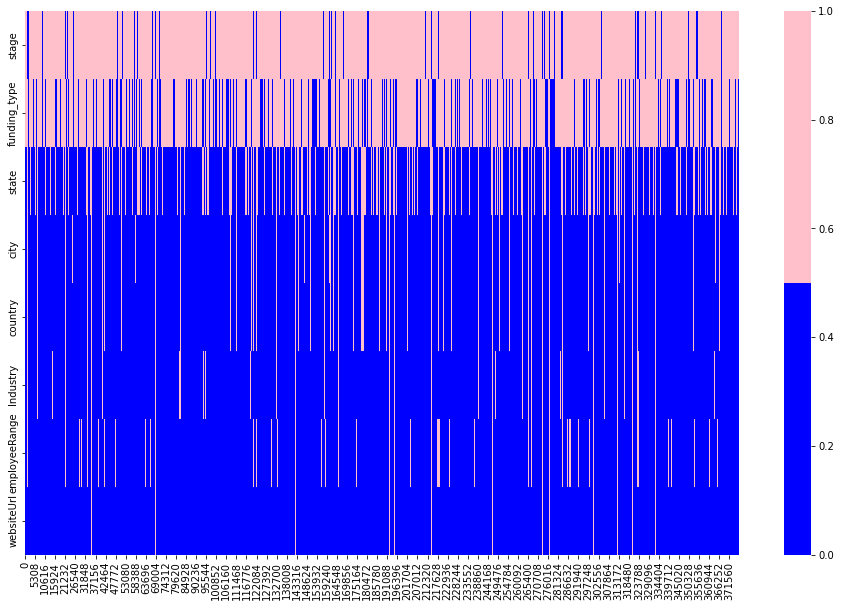

In [51]:
# Оценка пропусков
cols_null_percent(data=df_cleaned_1)

In [52]:
df_cleaned_1['name_norm'] = df_cleaned_1['name'].apply(lambda x: x.lower())

### Add index of best companies from another dataset 

In [53]:
best = pd.read_csv('raw_data/dataset-best-new.csv', sep=';', header=None)
best

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,DoiT International,Santa Clara,CA,United States,True,200-500,369,510,0,False,None,"{'__typename': 'FundingRound', 'id': 'd7f06985...",None,b,startup,https://careers.doit.com/,"['Analytics', 'Cloud', 'Data', 'Information Te..."
1,Apple,Cupertino,CA,United States,True,>10000,2922,180,0,False,None,None,None,u,established,https://www.apple.com/,"['Computing', 'Consumer Goods', 'Electronics',..."
2,Google,Mountain View,CA,United States,True,>10000,6334,427,0,False,None,"{'__typename': 'FundingRound', 'id': 'e3be9e34...",None,u,established,https://google.com,"['Messaging & Communication', 'Social Media', ..."
3,The Org,New York,NY,United States,True,10-50,2617,44,0,False,None,"{'__typename': 'FundingRound', 'id': '150c0ae6...",None,b,startup,https://theorg.com/,"['Human Resources', 'Internet', 'Productivity'..."
4,Amazon,Arlington,VA,United States,True,>10000,5615,338,0,False,None,"{'__typename': 'FundingRound', 'id': 'ca1c9971...",None,u,established,https://www.amazon.com/,"['Cloud', 'E-Commerce', 'Enterprise Software',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,AdaptHealth,Plymouth Meeting,PA,United States,True,5000-10000,2,21,0,False,None,"{'__typename': 'FundingRound', 'id': 'bedefca4...",None,u,None,https://www.adapthealth.com/,['Hospital']
1996,TCW Group,Los Angeles,CA,United States,True,500-1000,0,86,0,False,None,"{'__typename': 'FundingRound', 'id': 'c314759d...",None,u,None,http://tcw.com,['Banking']
1997,Cadence Design Systems,San Jose,CA,United States,True,5000-10000,22,23,0,False,None,None,None,u,None,https://www.cadence.com,['Software']
1998,G4S,NaN,England,United Kingdom,True,>10000,8,18,0,False,None,"{'__typename': 'FundingRound', 'id': 'f3ff86b6...",None,u,None,http://g4s.com,['Security']


In [56]:
# Совпадение имен компаний с вышеобработанным датасетом
best[0].isin(df_cleaned_1['name']).value_counts()

True     1992
False       8
Name: 0, dtype: int64

In [57]:
best_set = set(best[0])

In [58]:
# Добавление столбца - лучшая компания (0 / 1)
df_cleaned_1['best_company'] = df_cleaned_1['name'].apply(
    lambda x: 1 if x in best_set else 0
)

In [60]:
df_cleaned_1[df_cleaned_1['best_company'] == 1]

,name,city,state,country,employeeRange,followerCount,positionCount,stage,websiteUrl,Industry,funding_type,name_norm,best_company
26,1,NaN,NaN,NaN,NaN,1,0,established,NaN,NaN,NaN,1,1
358,1-800-FLOWERS.COM,Jericho,NY,United States,1000-5000,7,25,NaN,http://1800flowers.com,['Retail'],NaN,1-800-flowers.com,1
770,23andMe,Mountain View,CA,United States,500-1000,73,70,NaN,https://23andme.com,"['Biotechnology', 'Education']",post_ipo_equity,23andme,1
1568,3M,Saint Paul,MN,United States,>10000,221,106,established,https://www.3m.com/,['Engineering'],NaN,3m,1
1910,4G Clinical,Wellesley,MA,United States,200-500,2,110,NaN,http://4gclinical.com,['Pharmaceutical'],venture,4g clinical,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376167,Zomato,Gurugram,HR,India,1000-5000,48,12,NaN,https://zomato.com,['Internet'],venture,zomato,1
376261,Zoom,San Jose,CA,United States,5000-10000,437,94,established,https://zoom.us/,"['Information Technology', 'IT Services', 'Sof...",NaN,zoom,1
376296,ZoomInfo,Vancouver,WA,United States,1000-5000,47,62,established,https://www.zoominfo.com/,['Software'],NaN,zoominfo,1
376332,Zoox,Foster City,CA,United States,1000-5000,45,32,NaN,https://zoox.com/,['Automotive'],convertible_note,zoox,1


In [61]:
df_cleaned_1 = df_cleaned_1.drop(index=[26]).reset_index(drop=True)

___

In [62]:
df_1 = df_cleaned_1.copy()
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376822 entries, 0 to 376821
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   name           376822 non-null  object
 1   city           341115 non-null  object
 2   state          269752 non-null  object
 3   country        345701 non-null  object
 4   employeeRange  354766 non-null  object
 5   followerCount  376822 non-null  object
 6   positionCount  376822 non-null  int64 
 7   stage          18717 non-null   object
 8   websiteUrl     372438 non-null  object
 9   Industry       352919 non-null  object
 10  funding_type   102385 non-null  object
 11  name_norm      376822 non-null  object
 12  best_company   376822 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 37.4+ MB


In [63]:
df_1['funding_type'] = df_1['funding_type'].replace(to_replace='pre_seed', value='pre-seed')
df_1['funding_type'] = df_1['funding_type'].replace(to_replace='series_a', value='series a')
df_1['funding_type'] = df_1['funding_type'].replace(to_replace='series_b', value='series b')
df_1['funding_type'] = df_1['funding_type'].replace(to_replace='private_equity', value='private equity')
df_1['funding_type'] = df_1['funding_type'].replace(to_replace='debt_financing', value='debt funding')
df_1['funding_type'] = df_1['funding_type'].replace(to_replace='series_c', value='series c')
df_1['funding_type'] = df_1['funding_type'].replace(to_replace='equity_crowd_funding', value='crowdfunding')
df_1['funding_type'] = df_1['funding_type'].replace(to_replace='funding_round', value='funding')
df_1['funding_type'] = df_1['funding_type'].replace(to_replace='series_d', value='series d')
df_1['funding_type'] = df_1['funding_type'].replace(to_replace='corporate_round', value='corporate round')
df_1['funding_type'] = df_1['funding_type'].replace(to_replace='series_e', value='series e')
df_1['funding_type'] = df_1['funding_type'].replace(to_replace='product_crowd_funding', value='crowdfunding')
df_1['funding_type'] = df_1['funding_type'].replace(to_replace='series_f', value='series f')
df_1['funding_type'] = df_1['funding_type'].replace(to_replace='series_g', value='series g')
df_1['funding_type'] = df_1['funding_type'].replace(to_replace='series_h', value='series h')
df_1['funding_type'] = df_1['funding_type'].replace(to_replace='series_i', value='series i')
df_1['funding_type'] = df_1['funding_type'].replace(to_replace='series_j', value='series j')

___
# PART 2. Data from kaggle

In [64]:
raw_data_2 = pd.read_csv('raw_data/dataset.csv')
raw_data_2 = raw_data_2.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
raw_data_2

,COMPANY NAME,category_code,status,founded_at,closed_at,Website,twitter_username,short_description,description,overview,...,Founded,Description,Valuation,Date,year,month,day,founded,team_size,location
0,Wetpaint,web,operating,2005-10-17,NaN,http://wetpaint-inc.com,BachelrWetpaint,NaN,Technology Platform Company,Wetpaint is a technology platform company that...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Flektor,games_video,acquired,NaN,NaN,http://www.flektor.com,NaN,NaN,NaN,Flektor is a rich-media mash-up platform that ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,There,games_video,acquired,NaN,NaN,http://www.there.com,NaN,NaN,NaN,There.com is an online virtual world where any...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MYWEBBO,network_hosting,operating,2008-07-26,NaN,http://www.mywebbo.com,NaN,NaN,NaN,"BRAND NEW ONLINE SOCIAL NETWORKING WEBSITE,FOR...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,THE Movie Streamer,games_video,operating,2008-07-26,NaN,http://themoviestreamer.com,NaN,NaN,NaN,This company shows free movies online on their...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236128,Anfin,NaN,NaN,NaN,NaN,https://anfin.vn/,NaN,Modern stock trading for Vietnam,Anfin is building a modern trading experience ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0,40.0,"Ho Chi Minh City, Vietnam"
236129,InsureMyTeam,NaN,NaN,NaN,NaN,https://www.insuremyteam.com,NaN,Disrupting Indian Insurance space by empowerin...,India’s insurance market is filled with bygone...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0,11.0,"Mumbai, India"
236130,SALT,NaN,NaN,NaN,NaN,https://salt.pe,NaN,B2B Cross-Border Payment & Compliance Platform,Salt is a neo banking solution stitched togeth...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,14.0,"Bengaluru, India"
236131,NearWave,NaN,NaN,NaN,NaN,http://nearwave.co,NaN,Helping physicians select the right therapy fo...,NearWave makes a handheld imaging device that ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,1.0,"South Bend, IN"


In [65]:
raw_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236133 entries, 0 to 236132
Data columns (total 83 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   COMPANY NAME                                      236111 non-null  object 
 1   category_code                                     123186 non-null  object 
 2   status                                            196553 non-null  object 
 3   founded_at                                        91227 non-null   object 
 4   closed_at                                         2620 non-null    object 
 5   Website                                           144252 non-null  object 
 6   twitter_username                                  80591 non-null   object 
 7   short_description                                 8124 non-null    object 
 8   description                                       93017 non-null   object 
 9   over

In [66]:
data_2 = raw_data_2.copy()

In [67]:
data_2.duplicated().sum()

3

In [68]:
data_2 = data_2.drop_duplicates().reset_index(drop=True)
data_2.shape

(236130, 83)

### Company name 

In [69]:
data_2['COMPANY NAME'] = data_2['COMPANY NAME'].str.replace('#', '')
data_2['COMPANY NAME'] = data_2['COMPANY NAME'].str.replace('!', '')
data_2['COMPANY NAME'] = data_2['COMPANY NAME'].str.replace('"', '')
data_2['COMPANY NAME'] = data_2['COMPANY NAME'].str.replace('/', ' ')
data_2['COMPANY NAME'] = data_2['COMPANY NAME'].str.replace('\\', '')
data_2['COMPANY NAME'] = data_2['COMPANY NAME'].str.replace('xc2', '')
data_2['COMPANY NAME'] = data_2['COMPANY NAME'].str.replace('xa0', '')

In [70]:
data_2[data_2['COMPANY NAME'].isna()]

,COMPANY NAME,category_code,status,founded_at,closed_at,Website,twitter_username,short_description,description,overview,...,Founded,Description,Valuation,Date,year,month,day,founded,team_size,location
9079,NaN,ecommerce,operating,2010-02-13,NaN,http://www.mytable.pt,mytable_pt,NaN,Online restaurant bookings,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12033,NaN,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20890,NaN,NaN,operating,2012-01-01,NaN,NaN,NaN,NaN,NaN,Team-Up Dating Game provides engagement engine...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29978,NaN,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59623,NaN,other,operating,2012-01-01,NaN,http://www.elitedivingagency.com,Elite_D_Agency,NaN,Tailor-made Diving Services,Organises tailor-made diving services.\r\nPers...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65122,NaN,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67052,NaN,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68942,NaN,ecommerce,operating,2013-03-01,NaN,http://cokhos.com,cokhoscom,NaN,Online shopping and lifestyle company.,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73118,NaN,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78002,NaN,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
data_2.loc[9079, 'COMPANY NAME'] = 'mytable'
data_2.loc[59623, 'COMPANY NAME'] = 'Élite Diving Agency'
data_2.loc[68942, 'COMPANY NAME'] = 'cokhos'
data_2.loc[102075, 'COMPANY NAME'] = 'editionlingerie'
data_2.loc[114787, 'COMPANY NAME'] = 'cizimmasalari'
data_2.loc[117155, 'COMPANY NAME'] = 'oresundswebb'
data_2.loc[124905, 'COMPANY NAME'] = '3dprinter-ntp'
data_2.loc[129062, 'COMPANY NAME'] = 'unaspies'
data_2.loc[134422, 'COMPANY NAME'] = 'Digital Science & Research Solutions'
data_2.loc[144915, 'COMPANY NAME'] = 'Rainberry'
data_2.loc[160130, 'COMPANY NAME'] = 'Deloitte'
data_2.loc[161350, 'COMPANY NAME'] = 'u-gps'

In [72]:
data_2 = data_2[data_2['COMPANY NAME'].notna()].reset_index(drop=True)
data_2.shape

(236120, 83)

In [73]:
data_2['name_norm'] = data_2['COMPANY NAME'].apply(lambda x: x.lower())
data_2 = data_2.rename(columns = {'COMPANY NAME': 'name'})

### Category code, status 

In [74]:
data_2['category_code'].value_counts()

software            17921
web                 15118
other               13617
ecommerce            9065
games_video          7520
mobile               6862
advertising          6098
consulting           5006
enterprise           4441
biotech              4430
hardware             2951
education            2901
public_relations     2846
network_hosting      2350
search               2182
cleantech            1940
health               1698
finance              1386
social               1310
security             1171
medical              1153
analytics            1022
legal                1012
travel                936
local                 785
hospitality           768
news                  768
semiconductor         696
manufacturing         680
sports                675
music                 581
fashion               562
photo_video           544
transportation        489
real_estate           474
messaging             296
automotive            291
design                281
nonprofit   

In [75]:
data_2['status'].value_counts()

operating    183429
acquired       9394
closed         2584
ipo            1134
Name: status, dtype: int64

### Date transform 

In [76]:
data_2 = data_2.drop(columns=['year', 'month', 'day'])

In [77]:
data_2['founded_at'] = pd.to_datetime(
    data_2['founded_at'], yearfirst=True, errors='coerce'
)
data_2['Funding Date'] = pd.to_datetime(
    data_2['Funding Date'], yearfirst=True, errors='coerce'
)

In [78]:
def date_transform(col):
    if pd.isnull(col):
        return col
    else:
        new_col = datetime.strptime(col, '%b-%y')

    return new_col 


data_2['Funding Date'] = data_2['Funding Date'].apply(date_transform)

In [79]:
data_2['Date dd/mm/yyyy'] = pd.to_datetime(
    data_2['Date dd/mm/yyyy'], dayfirst=True, errors='coerce'
)
data_2['Date'] = pd.to_datetime(
    data_2['Date'], dayfirst=True, errors='coerce', infer_datetime_format=True
)

In [80]:
def date_transform_2(col):
    if pd.isnull(col):
        return col
    elif len(col) == 4:
        new_col = datetime.strptime(col, '%Y')
        return new_col
    else:
        date = ''
        for i in col.split():
            if 'st' in i or 'nd' in i or 'rd' in i or 'th' in i:
                i = i[:-2]
            date += i
        try:
            new_col = datetime.strptime(date, '%d%B%Y')
            return new_col
        except: pass

    return col


data_2['Founded'] = data_2['Founded'].apply(date_transform_2)

In [81]:
data_2['founded'] = data_2['founded'].astype(str)
data_2['founded'] = data_2['founded'].replace(to_replace='-1.0', value=np.nan)
data_2['founded'] = data_2['founded'].replace(to_replace='nan', value=np.nan)

In [82]:
def date_transform_3(col):
    if pd.isnull(col):
        return col
    else:
        new_col = datetime.strptime(col[:4], '%Y')

    return new_col 


data_2['founded'] = data_2['founded'].apply(date_transform_3)

In [83]:
# Объединение дублирующих столбцов с аналогичной датой
for ind in tqdm(range(data_2.shape[0])):
    if pd.isnull(data_2.loc[ind, 'founded_at']):
        data_2.loc[ind, 'founded_at'] = data_2.loc[ind, 'Funding Date']
    if pd.isnull(data_2.loc[ind, 'founded_at']):
        data_2.loc[ind, 'founded_at'] = data_2.loc[ind, 'Date dd/mm/yyyy']
    if pd.isnull(data_2.loc[ind, 'founded_at']):
        data_2.loc[ind, 'founded_at'] = data_2.loc[ind, 'Founded']
    if pd.isnull(data_2.loc[ind, 'founded_at']):
        data_2.loc[ind, 'founded_at'] = data_2.loc[ind, 'Date']
    if pd.isnull(data_2.loc[ind, 'founded_at']):
        data_2.loc[ind, 'founded_at'] = data_2.loc[ind, 'founded']

100%|████████████████████████████████████████████████████████████████████████| 236120/236120 [02:02<00:00, 1929.57it/s]


In [84]:
data_2 = data_2.drop(
    columns=['Funding Date', 'Date dd/mm/yyyy', 'Founded', 'Date', 
             'founded', 'created_at', 'updated_at', 'Updated at']
).reset_index(drop=True)
data_2.shape

(236120, 73)

In [85]:
data_2['closed_at'] = pd.to_datetime(
    data_2['closed_at'], yearfirst=True, errors='coerce'
)
data_2['founded_at'] = pd.to_datetime(
    data_2['founded_at'], yearfirst=True, errors='coerce'
)
data_2['first_investment_at'] = pd.to_datetime(
    data_2['first_investment_at'], yearfirst=True, errors='coerce'
)
data_2['last_investment_at'] = pd.to_datetime(
    data_2['last_investment_at'], yearfirst=True, errors='coerce'
)
data_2['first_funding_at'] = pd.to_datetime(
    data_2['first_funding_at'], yearfirst=True, errors='coerce'
)
data_2['last_funding_at'] = pd.to_datetime(
    data_2['last_funding_at'], yearfirst=True, errors='coerce'
)
data_2['first_milestone_at'] = pd.to_datetime(
    data_2['first_milestone_at'], yearfirst=True, errors='coerce'
)
data_2['last_milestone_at'] = pd.to_datetime(
    data_2['last_milestone_at'], yearfirst=True, errors='coerce'
)

### Money 

In [88]:
data_2['Funding Amount (USD)'] = (data_2['Funding Amount (USD)']
                                  .replace(to_replace='Unknown', value=np.nan))
data_2['Funding Amount (USD)'] = data_2['Funding Amount (USD)'].astype(float)

In [89]:
data_2['Amount in USD'] = data_2['Amount in USD'].str.replace(',', '')
data_2['Amount in USD'] = (data_2['Amount in USD']
                           .replace(to_replace='undisclosed', value=np.nan))
data_2['Amount in USD'] = (data_2['Amount in USD']
                           .replace(to_replace='unknown', value=np.nan))
data_2['Amount in USD'] = (data_2['Amount in USD']
                           .replace(to_replace='Undisclosed', value=np.nan))
data_2['Amount in USD'] = data_2['Amount in USD'].str.replace('+', '')
data_2['Amount in USD'] = data_2['Amount in USD'].str.replace('\\', '')
data_2['Amount in USD'] = data_2['Amount in USD'].str.replace('xc2', '')
data_2['Amount in USD'] = data_2['Amount in USD'].str.replace('xa0', '')
data_2['Amount in USD'] = data_2['Amount in USD'].str.replace('N/A', '')
data_2 = data_2[data_2['Amount in USD'] != ''].reset_index(drop=True)

In [90]:
data_2['Amount in USD'] = data_2['Amount in USD'].astype(float)

In [91]:
data_2[[
    'Funding Amount (USD)', 'funding_total_usd', 'Amount in USD'
]].describe().T

,count,mean,std,min,25%,50%,75%,max
Funding Amount (USD),3566.0,5.756014e+07,2.981976e+08,40000.0,5000000.0,15496301.5,50000000.0,1.660000e+10
funding_total_usd,27874.0,1.481652e+07,6.775937e+07,291.0,500000.0,2564500.0,11000000.0,5.700000e+09
Amount in USD,2073.0,1.840034e+07,1.211407e+08,16000.0,486000.0,1750000.0,8000000.0,3.900000e+09


Т.к. диапазоны значений трех столбцов сопоставимы и нет пересекающихся записей относительно данных признаков, объединяем их в один признак.

In [92]:
for ind in tqdm(range(data_2.shape[0])):
    if pd.isnull(data_2.loc[ind, 'funding_total_usd']):
        data_2.loc[ind, 'funding_total_usd'] = data_2.loc[ind, 'Funding Amount (USD)']

100%|███████████████████████████████████████████████████████████████████████| 236116/236116 [00:20<00:00, 11510.58it/s]


In [93]:
for ind in tqdm(range(data_2.shape[0])):
    if pd.isnull(data_2.loc[ind, 'funding_total_usd']):
        data_2.loc[ind, 'funding_total_usd'] = data_2.loc[ind, 'Amount in USD']

100%|███████████████████████████████████████████████████████████████████████| 236116/236116 [00:20<00:00, 11260.91it/s]


In [94]:
data_2[[
    'Last Valuation (Billion $)', 'Valuation'
]].describe().T

,count,mean,std,min,25%,50%,75%,max
Last Valuation (Billion $),1199.0,3.225588,7.601195,1.0,1.10,1.57,3.0,140.0
Valuation,936.0,3.281154,7.473179,1.0,1.05,1.60,3.0,140.0


Аналогично соединяем 2 столбца с финансовой оценкой компаний.

In [95]:
for ind in tqdm(range(data_2.shape[0])):
    if pd.isnull(data_2.loc[ind, 'Last Valuation (Billion $)']):
        data_2.loc[ind, 'Last Valuation (Billion $)'] = data_2.loc[ind, 'Valuation']

100%|████████████████████████████████████████████████████████████████████████| 236116/236116 [00:26<00:00, 9022.27it/s]


In [96]:
data_2 = data_2.rename(columns = {'Last Valuation (Billion $)': 'valuation_billion_usd'})

In [97]:
# Удаляем дублирующие столбцы
data_2 = data_2.drop(columns=[
    'Funding Amount (USD)', 'Amount in USD', 'Valuation'
]).reset_index(drop=True)

### City, country

In [98]:
# Объединяем дублирующие столбцы
for ind in tqdm(range(data_2.shape[0])):
    if pd.isnull(data_2.loc[ind, 'city']):
        data_2.loc[ind, 'city'] = data_2.loc[ind, 'City']

100%|███████████████████████████████████████████████████████████████████████| 236116/236116 [00:15<00:00, 15655.38it/s]


In [99]:
# Объединяем дублирующие столбцы
for ind in tqdm(range(data_2.shape[0])):
    if pd.isnull(data_2.loc[ind, 'city']):
        data_2.loc[ind, 'city'] = data_2.loc[ind, 'City  Location']

100%|███████████████████████████████████████████████████████████████████████| 236116/236116 [00:17<00:00, 13667.20it/s]


In [100]:
# Выделяем из локации город и код страны и объединяем дублирующие столбцы
for ind in tqdm(range(data_2.shape[0])):
    if pd.notnull(data_2.loc[ind, 'location']):
        lst = data_2.loc[ind, 'location'].split(', ')
        data_2.loc[ind, 'city'] = lst[0]
        if len(lst) > 1:
            if len(lst[1]) == 2:
                data_2.loc[ind, 'state_code'] = lst[1]
            elif len(lst[1]) > 2:
                data_2.loc[ind, 'country_code'] = lst[1]

100%|███████████████████████████████████████████████████████████████████████| 236116/236116 [00:02<00:00, 92282.74it/s]


In [101]:
# Объединяем дублирующие столбцы
for ind in tqdm(range(data_2.shape[0])):
    if pd.isnull(data_2.loc[ind, 'country_code']):
        data_2.loc[ind, 'country_code'] = data_2.loc[ind, 'COUNTRY']

100%|███████████████████████████████████████████████████████████████████████| 236116/236116 [00:17<00:00, 13635.52it/s]


In [102]:
# Удаляем дублирующие столбцы
data_2 = data_2.drop(columns=[
    'City', 'City  Location', 'location', 'COUNTRY', 'region'
]).reset_index(drop=True)

### TOP index 
Следующие признаки содержат информацию по различным категориям, в ТОП скольки компаний входит исследуемая компания. Далее преобразуем эти признаки в числовые.

In [106]:
data_2[data_2['Fund novelty'].notna()][['Fund novelty']].head(3)

,Fund novelty
204179,TOP10000
204180,TOP4000
204182,TOP10000


In [107]:
def top_modif(col):
    top = col
    if type(col) == str:
        top = int(col[3:])
    return top

In [108]:
data_2 = data_2.rename(columns = {'Fund novelty': 'TOP_novelty_companies'})
data_2['TOP_novelty_companies'] = data_2['TOP_novelty_companies'].apply(top_modif)

In [109]:
data_2 = data_2.rename(columns = {
    'Proximity to the year of peak activity': 'TOP_companies_at_peak_activity'
})
data_2['TOP_companies_at_peak_activity'] = data_2['TOP_companies_at_peak_activity'].apply(top_modif)

In [110]:
data_2 = data_2.rename(columns = {'Amount of Key Persons': 'TOP_key_persons'})
data_2['TOP_key_persons'] = data_2['TOP_key_persons'].apply(top_modif)

In [111]:
data_2 = data_2.rename(columns = {'Lead investments': 'TOP_lead_investments'})
data_2['TOP_lead_investments'] = data_2['TOP_lead_investments'].apply(top_modif)

In [112]:
data_2 = data_2.rename(columns = {'Unicorn amount': 'TOP_unicorn_amount'})
data_2['TOP_unicorn_amount'] = data_2['TOP_unicorn_amount'].apply(top_modif)

In [113]:
data_2 = data_2.rename(columns = {'Average rounds per year': 'TOP_avg_rounds_per_year'})
data_2['TOP_avg_rounds_per_year'] = data_2['TOP_avg_rounds_per_year'].apply(top_modif)

In [114]:
data_2 = data_2.rename(columns = {'Average round size': 'TOP_avg_round_size'})
data_2['TOP_avg_round_size'] = data_2['TOP_avg_round_size'].apply(top_modif)

In [115]:
data_2 = data_2.rename(columns = {'Average startup valuation': 'TOP_avg_startup_valuation'})
data_2['TOP_avg_startup_valuation'] = data_2['TOP_avg_startup_valuation'].apply(top_modif)

In [116]:
data_2 = data_2.rename(columns = {
    'Decision makers / strategy diversity index': 'TOP_decision_makers_strategy_diversity_index'
})
data_2['TOP_decision_makers_strategy_diversity_index'] = data_2[
    'TOP_decision_makers_strategy_diversity_index'
].apply(top_modif)

In [117]:
data_2 = data_2.rename(columns = {'Average multiplicator': 'TOP_avg_multiplicator'})
data_2['TOP_avg_multiplicator'] = data_2['TOP_avg_multiplicator'].apply(top_modif)

In [118]:
data_2 = data_2.rename(columns = {
    'Success / strategy diversity index': 'TOP_success_strategy_diversity_index'
})
data_2['TOP_success_strategy_diversity_index'] = data_2['TOP_success_strategy_diversity_index'].apply(top_modif)

In [119]:
data_2 = data_2.rename(columns = {'Follow-on index': 'TOP_follow_on_index'})
data_2['TOP_follow_on_index'] = data_2['TOP_follow_on_index'].apply(top_modif)

In [120]:
data_2 = data_2.rename(columns = {
    'Readiness to take younger startups': 'TOP_readiness_take_younger_startups'
})
data_2['TOP_readiness_take_younger_startups'] = data_2['TOP_readiness_take_younger_startups'].apply(top_modif)

In [121]:
data_2[['TOP_novelty_companies', 'TOP_companies_at_peak_activity',
        'TOP_key_persons', 'TOP_lead_investments',
        'TOP_unicorn_amount', 'TOP_avg_rounds_per_year',
        'TOP_avg_round_size', 'TOP_avg_startup_valuation',
        'TOP_decision_makers_strategy_diversity_index',
        'TOP_avg_multiplicator', 'TOP_success_strategy_diversity_index',
        'TOP_follow_on_index', 'TOP_readiness_take_younger_startups'
        ]].describe().T

,count,mean,std,min,25%,50%,75%,max
TOP_novelty_companies,16261.0,12485.917225,6996.836067,50.0,10000.0,10000.0,20000.0,20000.0
TOP_companies_at_peak_activity,26171.0,17417.752474,9199.509698,100.0,10000.0,20000.0,20000.0,30000.0
TOP_key_persons,8479.0,6545.583206,3170.494057,100.0,5000.0,5000.0,10000.0,10000.0
TOP_lead_investments,8572.0,6583.061129,3173.489763,100.0,5000.0,5000.0,10000.0,10000.0
TOP_unicorn_amount,3053.0,3594.824763,2021.574188,100.0,1000.0,5000.0,5000.0,5000.0
TOP_avg_rounds_per_year,26252.0,17474.859058,9226.719532,100.0,10000.0,20000.0,20000.0,30000.0
TOP_avg_round_size,25540.0,17106.891151,9094.715869,100.0,10000.0,20000.0,20000.0,30000.0
TOP_avg_startup_valuation,5282.0,4454.751988,2130.947328,100.0,5000.0,5000.0,5000.0,10000.0
TOP_decision_makers_strategy_diversity_index,997.0,709.127382,311.504544,100.0,500.0,500.0,1000.0,1000.0
TOP_avg_multiplicator,7813.0,6251.119928,3131.286359,100.0,5000.0,5000.0,10000.0,10000.0


In [122]:
# Удаляем неинформативные признаки
data_2 = data_2.drop(columns=[
    'lat', 'lng', 'Date Joined', 'Year Joined',
    'One of the most outstanding startups', 'Exits'
]).reset_index(drop=True)

### Description 

In [123]:
data_2 = data_2.rename(columns = {'short_description': 'long_description'})

In [124]:
for ind in tqdm(range(data_2.shape[0])):
    if pd.isnull(data_2.loc[ind, 'long_description']):
        data_2.loc[ind, 'long_description'] = data_2.loc[ind, 'overview']

100%|████████████████████████████████████████████████████████████████████████| 236116/236116 [00:23<00:00, 9910.58it/s]


In [125]:
for ind in tqdm(range(data_2.shape[0])):
    if pd.isnull(data_2.loc[ind, 'description']):
        data_2.loc[ind, 'description'] = data_2.loc[ind, 'SubVertical']

100%|███████████████████████████████████████████████████████████████████████| 236116/236116 [00:18<00:00, 12466.52it/s]


In [126]:
for ind in tqdm(range(data_2.shape[0])):
    if pd.isnull(data_2.loc[ind, 'long_description']):
        data_2.loc[ind, 'long_description'] = data_2.loc[ind, 'Tagline']

100%|███████████████████████████████████████████████████████████████████████| 236116/236116 [00:13<00:00, 16927.21it/s]


In [127]:
for ind in tqdm(range(data_2.shape[0])):
    if pd.isnull(data_2.loc[ind, 'description']):
        data_2.loc[ind, 'description'] = data_2.loc[ind, 'Description']

100%|███████████████████████████████████████████████████████████████████████| 236116/236116 [00:18<00:00, 12596.40it/s]


In [128]:
data_2 = data_2.drop(columns=[
    'overview', 'SubVertical', 'Tagline', 'Description'
]).reset_index(drop=True)

### Funding stage, investors 

In [129]:
for ind in tqdm(range(data_2.shape[0])):
    if pd.isnull(data_2.loc[ind, 'Investors']):
        data_2.loc[ind, 'Investors'] = data_2.loc[ind, 'Investors Name']

100%|████████████████████████████████████████████████████████████████████████| 236116/236116 [00:28<00:00, 8274.59it/s]


In [130]:
# Приводим в соответствие названия стадий финансирования 
# с названиями в таблицей the.org (для последующего объединения таблиц)

data_2['Funding Stage'] = data_2['Funding Stage'].replace(to_replace='Unkown', value='Unknown')
data_2['Funding Stage'] = data_2['Funding Stage'].replace(to_replace='Debt Financing', value='Debt Funding')

data_2['InvestmentnType'] = data_2['InvestmentnType'].replace(to_replace='Seed/ Angel Funding', value='Angel')
data_2['InvestmentnType'] = data_2['InvestmentnType'].replace(to_replace='Seed / Angel Funding', value='Angel')
data_2['InvestmentnType'] = data_2['InvestmentnType'].replace(to_replace='Seed / Angle Funding', value='Angel')
data_2['InvestmentnType'] = data_2['InvestmentnType'].replace(to_replace=r'Seed\\nFunding', value='Seed')
data_2['InvestmentnType'] = data_2['InvestmentnType'].replace(to_replace='Seed/Angel Funding', value='Angel')
data_2['InvestmentnType'] = data_2['InvestmentnType'].replace(to_replace='Angel / Seed Funding', value='Angel')
data_2['InvestmentnType'] = data_2['InvestmentnType'].replace(to_replace='Private Equity Round', value='Private Equity')
data_2['InvestmentnType'] = data_2['InvestmentnType'].replace(to_replace='Equity', value='Private Equity')
data_2['InvestmentnType'] = data_2['InvestmentnType'].replace(to_replace='Venture Round', value='Venture')
data_2['InvestmentnType'] = data_2['InvestmentnType'].replace(to_replace='Venture - Series Unknown', value='Venture')
data_2['InvestmentnType'] = data_2['InvestmentnType'].replace(to_replace='Seed Funding Round', value='Seed')
data_2['InvestmentnType'] = data_2['InvestmentnType'].replace(to_replace='Equity Based Funding', value='Private Equity')
data_2['InvestmentnType'] = data_2['InvestmentnType'].replace(to_replace='Angel Funding', value='Angel')
data_2['InvestmentnType'] = data_2['InvestmentnType'].replace(to_replace='Angel Round', value='Angel')
data_2['InvestmentnType'] = data_2['InvestmentnType'].replace(to_replace='Crowd Funding', value='Crowdfunding')
data_2['InvestmentnType'] = data_2['InvestmentnType'].replace(to_replace='Debt', value='Debt Funding')
data_2['InvestmentnType'] = data_2['InvestmentnType'].replace(to_replace='Debt and Preference capital', value='Debt Funding')
data_2['InvestmentnType'] = data_2['InvestmentnType'].replace(to_replace='Debt Funding', value='Debt Funding')
data_2['InvestmentnType'] = data_2['InvestmentnType'].replace(to_replace='Funding Round', value='Funding')
data_2['InvestmentnType'] = data_2['InvestmentnType'].replace(to_replace=r'Private\\nEquity', value='Private Equity')
data_2['InvestmentnType'] = data_2['InvestmentnType'].replace(to_replace='Pre Series A', value='Pre-Series A')
data_2['InvestmentnType'] = data_2['InvestmentnType'].replace(to_replace='pre-Series A', value='Pre-Series A')
data_2['InvestmentnType'] = data_2['InvestmentnType'].replace(to_replace='Pre Series A', value='Pre-Series A')
data_2['InvestmentnType'] = data_2['InvestmentnType'].replace(to_replace='Pre-series A', value='Pre-Series A')
data_2['InvestmentnType'] = data_2['InvestmentnType'].replace(to_replace='pre-series A', value='Pre-Series A')
data_2['InvestmentnType'] = data_2['InvestmentnType'].replace(to_replace='Private', value='Private Funding')
data_2['InvestmentnType'] = data_2['InvestmentnType'].replace(to_replace='PrivateEquity', value='Private Equity')
data_2['InvestmentnType'] = data_2['InvestmentnType'].replace(to_replace='Seed funding', value='Seed')
data_2['InvestmentnType'] = data_2['InvestmentnType'].replace(to_replace='Seed Funding', value='Seed')
data_2['InvestmentnType'] = data_2['InvestmentnType'].replace(to_replace='Debt-Funding', value='Debt Funding')

In [131]:
for ind in tqdm(range(data_2.shape[0])):
    if pd.isnull(data_2.loc[ind, 'Funding Stage']):
        data_2.loc[ind, 'Funding Stage'] = data_2.loc[ind, 'InvestmentnType']

100%|████████████████████████████████████████████████████████████████████████| 236116/236116 [00:26<00:00, 8857.94it/s]


In [132]:
data_2 = data_2.rename(columns = {'Funding Stage': 'funding_stage'})

In [133]:
data_2['funding_stage'] = data_2['funding_stage'].apply(
    lambda x: x.lower() if type(x)==str else x
)

In [134]:
data_2['funding_stage'].value_counts()

seed                     2239
private equity           1386
series a                  975
series b                  670
series c                  477
series d                  261
angel                     158
series e                  137
unknown                    65
series f                   64
pre-seed                   58
debt funding               40
series g                   27
pre-series a                9
seed round                  7
ico                         5
series h                    5
venture                     4
crowdfunding                4
private funding             2
corporate round             2
funding                     2
growth                      1
grant                       1
undisclosed                 1
maiden round                1
single venture              1
series j                    1
bridge round                1
inhouse funding             1
mezzanine                   1
series b (extension)        1
initial coin offering       1
structured

In [135]:
data_2 = data_2.drop(columns=[
    'Investors Name', 'InvestmentnType'
]).reset_index(drop=True)

In [136]:
data_2['status'].value_counts()

operating    183429
acquired       9394
closed         2584
ipo            1134
Name: status, dtype: int64

In [137]:
data_2['Fund structure'].value_counts()

VC             15834
Corporation     9178
Name: Fund structure, dtype: int64

In [138]:
data_2['category_code'].value_counts()

software            17921
web                 15118
other               13617
ecommerce            9065
games_video          7520
mobile               6862
advertising          6098
consulting           5006
enterprise           4441
biotech              4430
hardware             2951
education            2901
public_relations     2846
network_hosting      2350
search               2182
cleantech            1940
health               1698
finance              1386
social               1310
security             1171
medical              1153
analytics            1022
legal                1012
travel                936
local                 785
hospitality           768
news                  768
semiconductor         696
manufacturing         680
sports                675
music                 581
fashion               562
photo_video           544
transportation        489
real_estate           474
messaging             296
automotive            291
design                281
nonprofit   

In [139]:
data_2['INDUSTRY'].value_counts()

Software and Services             1052
Consumer Internet                  941
Consumer                           848
B2B Software                       632
Technology                         483
                                  ... 
Virtual Reality, Hardware            1
Health Care, Renewable Energy        1
Music, Computer                      1
Water Purification, Industrial       1
Finttech                             1
Name: INDUSTRY, Length: 13637, dtype: int64

In [140]:
data_2.duplicated().sum()

35

In [141]:
data_2 = data_2.drop_duplicates().reset_index(drop=True)
data_2.shape

(236081, 53)

ROI                                                 99.692478
TOP_decision_makers_strategy_diversity_index        99.577687
team_size                                           99.576417
valuation_billion_usd                               99.095649
first_investment_at                                 98.906731
last_investment_at                                  98.906731
invested_companies                                  98.903342
investment_rounds                                   98.903342
closed_at                                           98.890211
SUB-INDUSTRY                                        98.787704
TOP_unicorn_amount                                  98.706800
Investors                                           97.818122
TOP_avg_startup_valuation                           97.762632
funding_stage                                       97.200537
TOP_success_strategy_diversity_index                96.831172
TOP_avg_multiplicator                               96.690543
TOP_key_

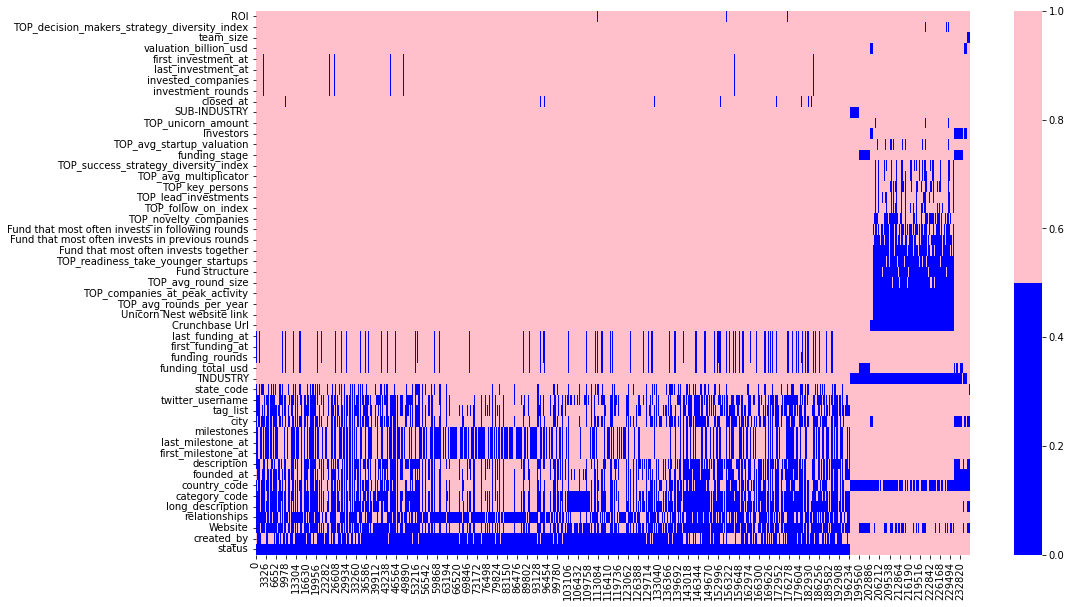

In [142]:
# Оцениваем пропуски
cols_null_percent(data=data_2)

In [152]:
df_2 = pd.read_csv('raw_data/data_2_final.csv', parse_dates=[7, 8, 9, 10, 11, 12, 13, 14])

____

# Part 3. Merge kaggle and theorg datasets
Для объединения выбрано 3 ключа (компания, сайт и стадия финансирования), метод outer для избежжания потери информации

In [153]:
data_merge = pd.merge(
    df_2, df_1, 
    left_on=['name_norm', 'Website', 'funding_stage'], 
    right_on=['name_norm', 'websiteUrl', 'funding_type'], how='outer'
)

In [154]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604428 entries, 0 to 604427
Data columns (total 65 columns):
 #   Column                                            Non-Null Count   Dtype         
---  ------                                            --------------   -----         
 0   name_x                                            236081 non-null  object        
 1   name_norm                                         604428 non-null  object        
 2   Website                                           144244 non-null  object        
 3   country_code                                      121870 non-null  object        
 4   city_x                                            89834 non-null   object        
 5   state_code                                        51126 non-null   object        
 6   status                                            196508 non-null  object        
 7   founded_at                                        96346 non-null   datetime64[ns]
 8   closed_at     

In [155]:
dm = data_merge.copy()

In [156]:
# Далее объединяем дублирующие столбцы

for ind in tqdm(range(dm.shape[0])):
    if pd.isnull(dm.loc[ind, 'name_x']):
        dm.loc[ind, 'name_x'] = dm.loc[ind, 'name_y']

100%|███████████████████████████████████████████████████████████████████████| 604428/604428 [00:48<00:00, 12425.86it/s]


In [157]:
dm = dm.rename(columns = {'name_x': 'name'})
dm = dm.drop(columns=['name_y']).reset_index(drop=True)

In [158]:
for ind in tqdm(range(dm.shape[0])):
    if pd.isnull(dm.loc[ind, 'city_x']):
        dm.loc[ind, 'city_x'] = dm.loc[ind, 'city_y']

100%|████████████████████████████████████████████████████████████████████████| 604428/604428 [01:07<00:00, 8991.86it/s]


In [159]:
dm = dm.rename(columns = {'city_x': 'city'})

In [160]:
for ind in tqdm(range(dm.shape[0])):
    if pd.isnull(dm.loc[ind, 'state_code']):
        dm.loc[ind, 'state_code'] = dm.loc[ind, 'state']

100%|████████████████████████████████████████████████████████████████████████| 604428/604428 [01:14<00:00, 8136.27it/s]


In [161]:
for ind in tqdm(range(dm.shape[0])):
    if pd.isnull(dm.loc[ind, 'country_code']):
        dm.loc[ind, 'country_code'] = dm.loc[ind, 'country']

100%|████████████████████████████████████████████████████████████████████████| 604428/604428 [01:07<00:00, 8984.77it/s]


In [162]:
for ind in tqdm(range(dm.shape[0])):
    if pd.isnull(dm.loc[ind, 'Website']):
        dm.loc[ind, 'Website'] = dm.loc[ind, 'websiteUrl']

100%|███████████████████████████████████████████████████████████████████████| 604428/604428 [00:58<00:00, 10307.95it/s]


In [163]:
for ind in tqdm(range(dm.shape[0])):
    if pd.isnull(dm.loc[ind, 'funding_stage']):
        dm.loc[ind, 'funding_stage'] = dm.loc[ind, 'funding_type']

100%|████████████████████████████████████████████████████████████████████████| 604428/604428 [01:19<00:00, 7622.47it/s]


In [164]:
dm = dm.drop(columns=[
    'city_y', 'state', 'country', 'websiteUrl', 'funding_type'
]).reset_index(drop=True)

In [165]:
dm1 = dm.copy()

In [166]:
dm1['Industry'] = dm1['Industry'].str.replace('[', '')
dm1['Industry'] = dm1['Industry'].str.replace(']', '')
dm1['Industry'] = dm1['Industry'].str.replace("'", '')

for ind in tqdm(range(dm1.shape[0])):
    if pd.isnull(dm1.loc[ind, 'INDUSTRY']):
        dm1.loc[ind, 'INDUSTRY'] = dm1.loc[ind, 'Industry']

100%|████████████████████████████████████████████████████████████████████████| 604428/604428 [01:13<00:00, 8270.03it/s]


In [167]:
dm1 = dm1.drop(columns=['Industry']).reset_index(drop=True)

In [168]:
dm2 = dm1.copy()

In [169]:
# Добавляем признак - лучшие компании к оставшимся записям
dm2['best_company2'] = dm2['name'].apply(
    lambda x: 1 if x in best_set else 0)
dm2 = dm2.drop(columns=['best_company']).reset_index(drop=True
                                                    )
dm2 = dm2.rename(columns = {'best_company2': 'best_company'})

In [170]:
dm2['best_company'].value_counts()

0    600680
1      3748
Name: best_company, dtype: int64

In [171]:
dm2.duplicated().sum()

0

In [172]:
# Добавляем категоризацию количества сотрудников к части строк
for ind in tqdm(range(dm2.shape[0])):
    if pd.notnull(dm2.loc[ind, 'team_size']):
        if dm2.loc[ind, 'team_size'] <=10:
            dm2.loc[ind, 'employeeRange'] = '1-10'
        elif (dm2.loc[ind, 'team_size'] <=50) & (dm2.loc[ind, 'team_size'] >10):
            dm2.loc[ind, 'employeeRange'] = '10-50'
        elif (dm2.loc[ind, 'team_size'] <=200) & (dm2.loc[ind, 'team_size'] >50):
            dm2.loc[ind, 'employeeRange'] = '50-200'
        elif (dm2.loc[ind, 'team_size'] <=500) & (dm2.loc[ind, 'team_size'] >200):
            dm2.loc[ind, 'employeeRange'] = '200-500'
        elif (dm2.loc[ind, 'team_size'] <=1000) & (dm2.loc[ind, 'team_size'] >500):
            dm2.loc[ind, 'employeeRange'] = '500-1000'
        elif (dm2.loc[ind, 'team_size'] <=5000) & (dm2.loc[ind, 'team_size'] >1000):
            dm2.loc[ind, 'employeeRange'] = '1000-5000'
        elif (dm2.loc[ind, 'team_size'] <=10000) & (dm2.loc[ind, 'team_size'] >5000):
            dm2.loc[ind, 'employeeRange'] = '5000-10000'
        elif dm2.loc[ind, 'team_size'] > 10000:
            dm2.loc[ind, 'employeeRange'] = '>10000'

100%|███████████████████████████████████████████████████████████████████████| 604428/604428 [00:07<00:00, 79287.79it/s]


In [173]:
dm2['employeeRange'].value_counts()

10-50         103708
1-10           97050
50-200         46056
200-500        45217
1000-5000      31307
500-1000       20073
>10000          6851
5000-10000      5496
Name: employeeRange, dtype: int64

In [174]:
dm2.shape

(604428, 58)

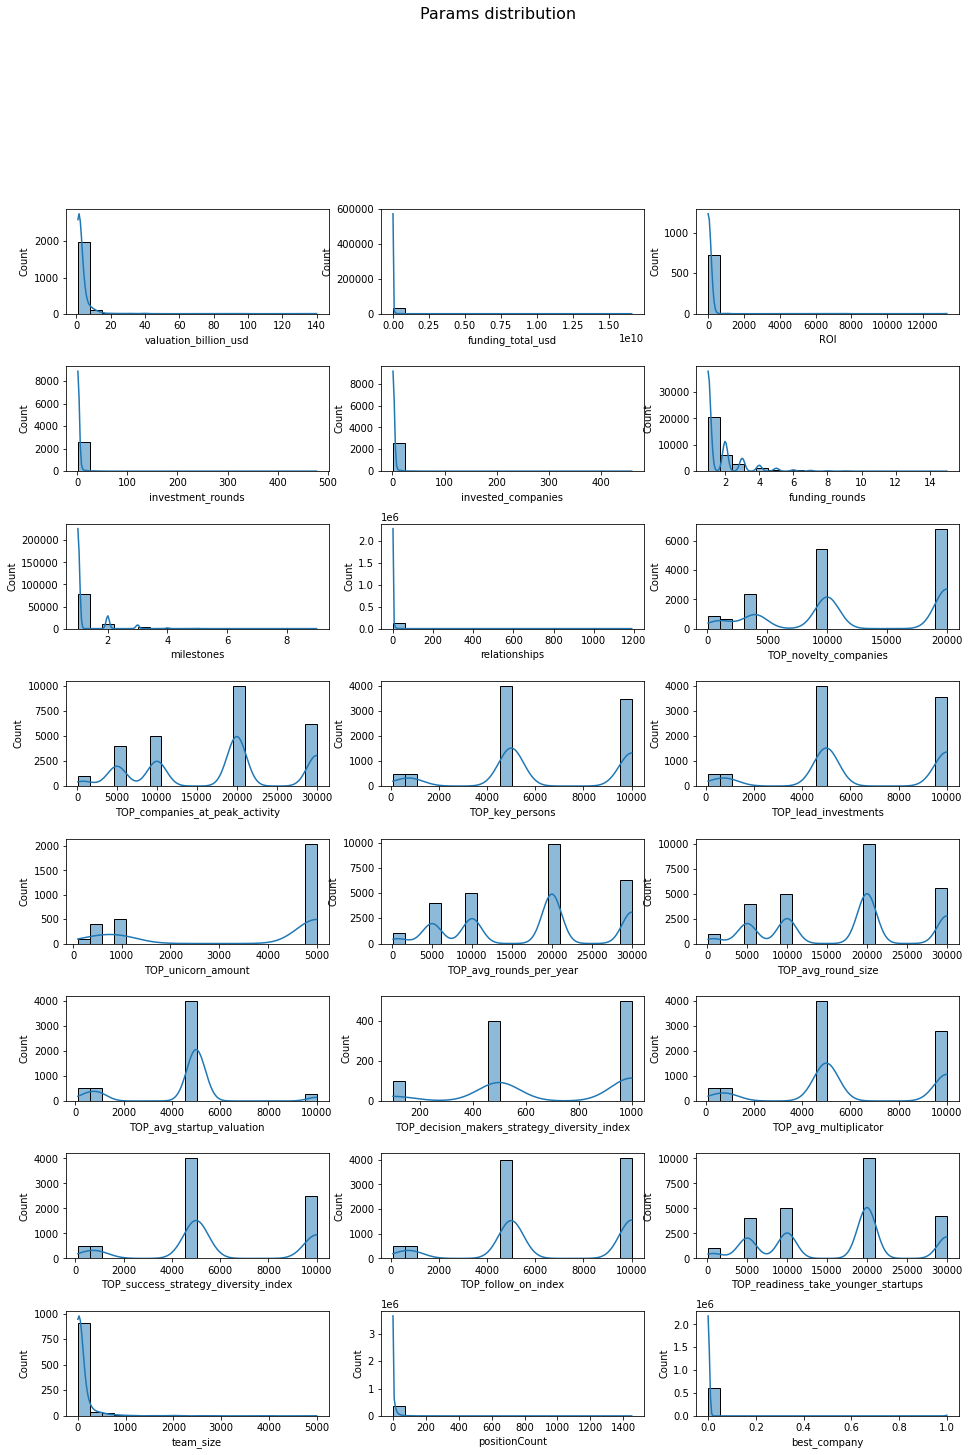

In [192]:
plot_histograms(dm2.select_dtypes(include='number'), 10, (16, 28))